In [1]:
%matplotlib inline
import collections
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import pandas as pd

In [2]:
# Author: Patrick 't Jong


======================
Reading the graph TSV.
======================

Import the graph from the file.



In [2]:
import networkx as nx

fh = open("large.tsv", 'rb')
G = nx.read_edgelist("large.tsv", create_using=nx.DiGraph())

print "# of Nodes: ", G.number_of_nodes()
print "# of Edges: ", G.number_of_edges()

# of Nodes:  279630
# of Edges:  1731653


## Calculation of In/Outdegree.


Degree sequence calculation and plot.

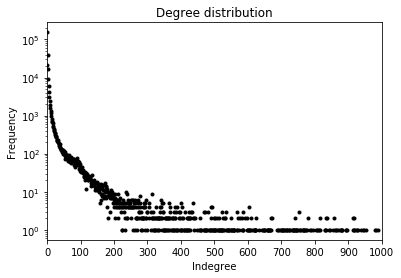

In [5]:
#InDegree sequence calculation
degree_sequence = sorted([d for n, d in G.in_degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot sequence as distribution
fig, ax = plt.subplots()
ax.plot(deg, cnt, 'k.')
ax.set(xlabel='Indegree', ylabel='Frequency',
       title='Degree distribution')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.set_xlim(0, 1000)
ax.set_yscale('log')
#ax.grid()
fig.savefig("l_indegree.png")
plt.show()

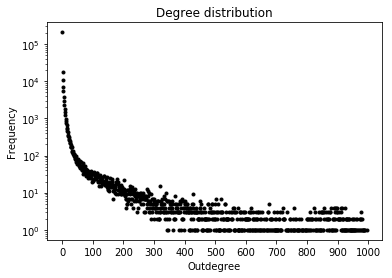

In [6]:
#OutDegree sequence calculation
degree_sequence = sorted([d for n, d in G.out_degree()], reverse=True)
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

#Plot sequence as distribution
fig, ax = plt.subplots()
ax.plot(deg, cnt, 'k.')
ax.set(xlabel='Outdegree', ylabel='Frequency',
       title='Degree distribution')
ax.xaxis.set_major_locator(ticker.MultipleLocator(100))
ax.set_yscale('log')
#ax.grid()
fig.savefig("l_outdegree.png")
plt.show()

## Calculation weak/strong components.

Nodes/Links calculation in the largest stronly connected component.

In [7]:
print "# of weakly connected components:   ", len(list(nx.weakly_connected_components(G)))
print "# of strongly connected components: ", len(list(nx.strongly_connected_components(G)))

# of weakly connected components:    6863
# of strongly connected components:  240113


In [8]:
largest = max(nx.strongly_connected_component_subgraphs(G), key=len)
print "# of nodes in the largest stronly connected component: ", len(largest.nodes())
print "# of edges in the largest stronly connected component: ", len(largest.edges())

# of nodes in the largest stronly connected component:  34826
# of edges in the largest stronly connected component:  799102


## Calculation average clustering coefficient.

The network is imported as undirected graph to allign with the calculation.


In [3]:
#Import as undirected graph
GU = nx.read_edgelist("large.tsv")
print(nx.average_clustering(GU))

0.0924363510161


## Calculation distance distribution of the weakly component.

Largest weakly connected component of this network.

In [ ]:
largest = max(nx.weakly_connected_component_subgraphs(G), key=len)
print(nx.average_shortest_path_length(largest))

In [ ]:
largest = max(nx.weakly_connected_component_subgraphs(G), key=len)
First = True
for node in largest:
    path_length=nx.single_source_shortest_path_length(G, node)
    df = pd.DataFrame({'path_length':path_length.values()})
    if (First):
        dftotal = df.groupby(['path_length']).size()
        First = False
    else: 
        dftotal = dftotal.add(df.groupby(['path_length']).size(), fill_value=0)

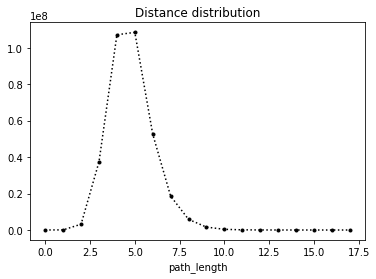

In [4]:
dftotal.plot(y='distance', style='k.:',title='Distance distribution')